In [80]:
#! pip install -U giotto-tda --quiet

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



#from google.colab import drive

#drive.mount('/content/drive')

#path = 'drive/MyDrive/MUIA/TFM/'
path=''

In [82]:
#reads the csv
stocks = pd.read_excel(f'{path}data/stocks_spain.xlsx')
stocks.drop(columns=stocks.columns[0], axis=1, inplace=True)

stocks


,Date,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
0,2018-01-02,8.710,60.220001,48.349998,11.220,32.255001,170.500000,8.348511,7.953,7.082,...,1.655001,1.660000,5.226751,2.500,8.191,9.400,4.397,1.2900,66.521370,54.700001
1,2018-01-03,8.665,60.500000,49.299999,11.230,32.470001,172.399994,8.539362,7.964,7.094,...,1.676181,1.920000,5.227709,2.459,8.166,9.432,4.430,1.3100,66.286316,55.000000
2,2018-01-04,8.770,61.820000,49.750000,11.430,33.490002,175.399994,8.612767,8.082,7.221,...,1.717063,1.960000,5.403084,2.553,8.295,9.574,4.470,1.3200,66.286316,55.599998
3,2018-01-05,8.865,63.500000,50.299999,11.570,33.939999,177.350006,8.563830,8.140,7.253,...,1.738736,2.040000,5.438543,2.572,8.358,9.830,4.450,1.3150,66.599724,56.500000
4,2018-01-08,8.750,62.959999,49.700001,11.540,33.650002,178.250000,8.632341,8.124,7.235,...,1.729870,2.270000,5.454834,2.600,8.370,9.570,4.405,1.3070,66.443016,56.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2023-03-14,3.466,60.459999,44.849998,7.580,28.709999,153.199997,8.735000,6.098,6.690,...,1.139000,17.540001,3.445500,2.928,3.811,3.098,3.190,1.0890,95.699997,65.599998
1332,2023-03-15,3.380,58.160000,44.450001,7.310,28.030001,145.949997,8.670000,5.704,6.048,...,1.019500,16.830000,3.208000,2.828,3.753,3.052,3.065,1.0230,94.000000,66.199997
1333,2023-03-16,3.380,59.400002,44.799999,7.410,28.469999,148.449997,8.815000,5.560,6.254,...,1.014500,17.040001,3.291500,2.852,3.722,3.062,3.075,1.0050,95.099998,66.800003
1334,2023-03-17,3.346,58.320000,45.299999,7.280,28.160000,142.399994,8.735000,5.420,6.036,...,0.982600,16.885000,3.138500,2.792,3.702,3.022,3.025,0.9875,94.199997,66.550003


In [83]:
# Calcular retornos 
logreturn = np.log(stocks.iloc[:,1:]).diff()
logreturn = logreturn.iloc[1: , :]
logreturn

,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,ACX,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
1,-0.005180,0.004639,0.019458,0.000891,0.006644,0.011082,0.022603,0.001382,0.001693,0.016007,...,0.012716,0.145508,0.000183,-0.016536,-0.003057,0.003399,0.007477,0.015385,-0.003540,0.005469
2,0.012045,0.021584,0.009086,0.017653,0.030930,0.017252,0.008559,0.014708,0.017744,0.001221,...,0.024097,0.020619,0.032997,0.037514,0.015674,0.014943,0.008989,0.007605,0.000000,0.010850
3,0.010774,0.026813,0.010995,0.012174,0.013347,0.011056,-0.005698,0.007151,0.004422,-0.000407,...,0.012543,0.040005,0.006541,0.007415,0.007566,0.026388,-0.004484,-0.003795,0.004717,0.016057
4,-0.013057,-0.008540,-0.012000,-0.002596,-0.008581,0.005062,0.007968,-0.001968,-0.002485,0.005275,...,-0.005112,0.106830,0.002991,0.010828,0.001435,-0.026806,-0.010164,-0.006102,-0.002356,-0.006214
5,-0.005731,0.011371,0.010010,0.001732,0.005630,0.005036,0.041638,0.003686,0.003725,-0.004055,...,0.021131,-0.017778,0.001755,-0.005399,0.000358,-0.001464,-0.010268,-0.002298,0.002356,0.008865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.005207,0.031589,0.019134,0.030133,0.025041,0.030823,0.012093,0.027937,0.033592,0.011410,...,0.043973,0.012333,0.029752,0.022799,0.000262,0.001292,-0.003130,0.020409,0.035091,0.003053
1332,-0.025125,-0.038784,-0.008959,-0.036270,-0.023970,-0.048480,-0.007469,-0.066793,-0.100886,-0.071826,...,-0.110838,-0.041321,-0.071421,-0.034750,-0.015336,-0.014960,-0.039973,-0.062520,-0.017923,0.009105
1333,0.000000,0.021096,0.007843,0.013587,0.015575,0.016984,0.016586,-0.025570,0.033494,0.001108,...,-0.004916,0.012401,0.025696,0.008451,-0.008294,0.003271,0.003257,-0.017752,0.011634,0.009023
1334,-0.010110,-0.018349,0.011099,-0.017700,-0.010948,-0.041608,-0.009117,-0.025502,-0.035480,-0.005773,...,-0.031949,-0.009138,-0.047598,-0.021262,-0.005388,-0.013149,-0.016394,-0.017566,-0.009509,-0.003750


In [84]:
np.version.version

'1.20.3'

In [85]:
import importlib.util

# For illustrative purposes.
package_name = 'gtda'

spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +" is not installed")

In [149]:
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceLandscape
from sklearn.preprocessing import StandardScaler

# Constructing persistence landscapes
window_size = 100
#n_points = 1000
#t_range = np.linspace(0, 5, n_points)
landscapes_list = []
norms = []

show=True

for i in range(len(logreturn) - window_size + 1): #Sliding window from 0 to 1xxx
    X = StandardScaler().fit_transform(logreturn.iloc[i : i + window_size, :].values)
    
    VR = VietorisRipsPersistence(metric="euclidean", homology_dimensions=[0,1], n_jobs=-1) #Probar dimensiones (0,1)
    diagrams = VR.fit_transform([X])

    landscapes = PersistenceLandscape(n_jobs=-1).fit_transform(diagrams)
    landscapes_list.append(landscapes)

    norm_1 = np.linalg.norm(landscapes[0, 0, :], ord=1)
    norm_2 = np.linalg.norm(landscapes[0, 0, :], ord=2)
    norms.append([norm_1, norm_2])

    if show == True:
      print(np.shape(X))
      print('diagrams:')
      print(diagrams)
      print('landscapes:')
      print(landscapes)
      print('norm1:')
      print(norm_1)
      print('---')
      show = False

norms = np.array(norms)



(100, 57)
diagrams:
[[[ 0.          5.33751774  0.        ]
  [ 0.          5.46299267  0.        ]
  [ 0.          5.54639482  0.        ]
  [ 0.          5.64303398  0.        ]
  [ 0.          5.65321064  0.        ]
  [ 0.          5.89845896  0.        ]
  [ 0.          5.95835066  0.        ]
  [ 0.          6.08428288  0.        ]
  [ 0.          6.12866259  0.        ]
  [ 0.          6.1624217   0.        ]
  [ 0.          6.17822552  0.        ]
  [ 0.          6.18668938  0.        ]
  [ 0.          6.18798208  0.        ]
  [ 0.          6.18959856  0.        ]
  [ 0.          6.22735739  0.        ]
  [ 0.          6.25177145  0.        ]
  [ 0.          6.25888348  0.        ]
  [ 0.          6.28470278  0.        ]
  [ 0.          6.31936073  0.        ]
  [ 0.          6.36677933  0.        ]
  [ 0.          6.37967634  0.        ]
  [ 0.          6.42810345  0.        ]
  [ 0.          6.43249846  0.        ]
  [ 0.          6.44802666  0.        ]
  [ 0.          6.46

(1, 136, 3)


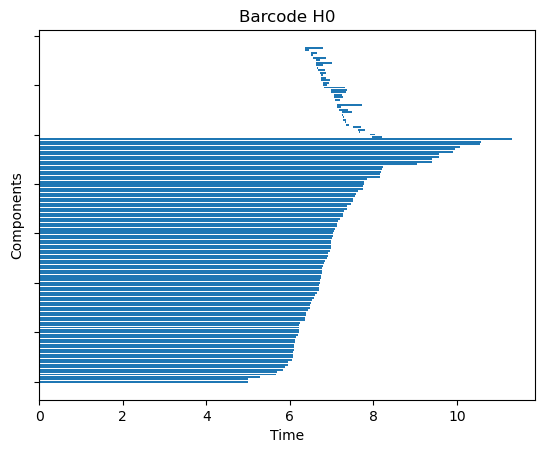

In [150]:
# Plotting persistence barcode
print(np.shape(diagrams))
#print(diagrams[0][:, :3]) 

name = f'H{int(diagrams[0][0][2])}'
finish_values = diagrams[0][:,1]
#print(finish_values)
start_values = diagrams[0][:,0]
#print(start_values)

# Calculate the bar lengths
bar_lengths = [f - s for s, f in zip(start_values, finish_values)]

# Create a horizontal bar plot
fig, ax = plt.subplots()
ax.barh(range(len(start_values)), bar_lengths, left=start_values)

# Set the y-axis ticks and labels
ax.set_yticklabels([])
ax.set_ylabel('Components')

# Set the x-axis label
ax.set_xlabel('Time')

plt.title(f'Barcode {name}')
plt.show()

In [151]:
import gtda
print(gtda.__version__)

0.6.0


In [152]:
from gtda.plotting import plot_diagram

# Plotting persistence diagram

print(np.shape(diagrams))
print(diagrams[0][:, :3]) # plot diagram recieve: (birth, death, and persistence values).
plot_diagram(diagrams[0][:, :3])  # extract the first diagram and plot it



(1, 136, 3)
[[ 0.          4.99962854  0.        ]
 [ 0.          5.00634432  0.        ]
 [ 0.          5.28086472  0.        ]
 [ 0.          5.67855072  0.        ]
 [ 0.          5.69537354  0.        ]
 [ 0.          5.84170628  0.        ]
 [ 0.          5.8792305   0.        ]
 [ 0.          5.95764017  0.        ]
 [ 0.          5.95881224  0.        ]
 [ 0.          6.06381369  0.        ]
 [ 0.          6.06565857  0.        ]
 [ 0.          6.06586981  0.        ]
 [ 0.          6.07566786  0.        ]
 [ 0.          6.09452629  0.        ]
 [ 0.          6.09474897  0.        ]
 [ 0.          6.09728289  0.        ]
 [ 0.          6.12046862  0.        ]
 [ 0.          6.12958241  0.        ]
 [ 0.          6.1581645   0.        ]
 [ 0.          6.20708466  0.        ]
 [ 0.          6.21186447  0.        ]
 [ 0.          6.21729088  0.        ]
 [ 0.          6.21793461  0.        ]
 [ 0.          6.22057819  0.        ]
 [ 0.          6.24597597  0.        ]
 [ 0.        

In [153]:
print(len(landscapes_list))
example_landscape = landscapes_list[len(landscapes_list)-1]

print(example_landscape)
# Plot the first landscape
# PersistenceLandscape.plot(diagrams, Xt=example_landscape)


1236
[[[0.         0.11427074 0.22854148 0.34281222 0.45708296 0.5713537
   0.68562444 0.79989518 0.91416592 1.02843666 1.1427074  1.25697814
   1.37124888 1.48551962 1.59979036 1.7140611  1.82833184 1.94260258
   2.05687332 2.17114406 2.2854148  2.39968554 2.51395628 2.62822702
   2.74249776 2.8567685  2.97103924 3.08530998 3.19958072 3.31385146
   3.4281222  3.54239294 3.65666368 3.77093442 3.88520516 3.9994759
   4.11374664 4.22801738 4.34228812 4.45655886 4.5708296  4.68510034
   4.79937108 4.91364182 5.02791256 5.1421833  5.25645404 5.37072478
   5.48499552 5.59926626 5.59926626 5.48499552 5.37072478 5.25645404
   5.1421833  5.02791256 4.91364182 4.79937108 4.68510034 4.5708296
   4.45655886 4.34228812 4.22801738 4.11374664 3.9994759  3.88520516
   3.77093442 3.65666368 3.54239294 3.4281222  3.31385146 3.19958072
   3.08530998 2.97103924 2.8567685  2.74249776 2.62822702 2.51395628
   2.39968554 2.2854148  2.17114406 2.05687332 1.94260258 1.82833184
   1.7140611  1.59979036 1.48551

1236
[[[0.         0.11427074 0.22854148 0.34281222 0.45708296 0.5713537
   0.68562444 0.79989518 0.91416592 1.02843666 1.1427074  1.25697814
   1.37124888 1.48551962 1.59979036 1.7140611  1.82833184 1.94260258
   2.05687332 2.17114406 2.2854148  2.39968554 2.51395628 2.62822702
   2.74249776 2.8567685  2.97103924 3.08530998 3.19958072 3.31385146
   3.4281222  3.54239294 3.65666368 3.77093442 3.88520516 3.9994759
   4.11374664 4.22801738 4.34228812 4.45655886 4.5708296  4.68510034
   4.79937108 4.91364182 5.02791256 5.1421833  5.25645404 5.37072478
   5.48499552 5.59926626 5.59926626 5.48499552 5.37072478 5.25645404
   5.1421833  5.02791256 4.91364182 4.79937108 4.68510034 4.5708296
   4.45655886 4.34228812 4.22801738 4.11374664 3.9994759  3.88520516
   3.77093442 3.65666368 3.54239294 3.4281222  3.31385146 3.19958072
   3.08530998 2.97103924 2.8567685  2.74249776 2.62822702 2.51395628
   2.39968554 2.2854148  2.17114406 2.05687332 1.94260258 1.82833184
   1.7140611  1.59979036 1.48551

<function matplotlib.pyplot.show(close=None, block=None)>

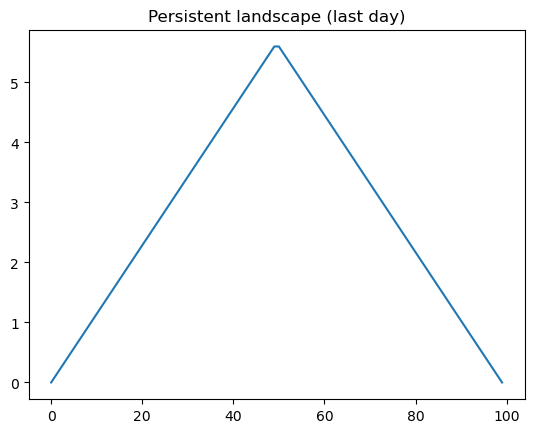

In [154]:
# Plotting landscapes 
#https://giotto-ai.github.io/gtda-docs/latest/modules/generated/diagrams/representations/gtda.diagrams.PersistenceLandscape.html

print(len(landscapes_list))
example_landscape = landscapes_list[len(landscapes_list)-1]
print(example_landscape)
print(np.shape(example_landscape))
print(example_landscape[0][0])

plt.plot(example_landscape[0][0])
plt.title('Persistent landscape (last day)')
plt.show

In [155]:
# Calculate mean of all columns for each row/day
mean_df = pd.DataFrame(logreturn.mean(axis=1), columns=['mean'])
print(np.shape(mean_df))
mean_df = mean_df.iloc[window_size:,:]
print(np.shape(mean_df))
print(mean_df)

# Calculate dates df to plot
dates = pd.to_datetime(stocks['Date'][window_size+1:]) #Este +1?
dates_lnorm = pd.to_datetime(stocks['Date'][window_size:])
print(len(dates))
print(dates)

(1335, 1)
(1235, 1)
          mean
101  -0.003221
102  -0.020433
103   0.005168
104  -0.007294
105   0.015655
...        ...
1331  0.017248
1332 -0.038714
1333  0.007285
1334 -0.013884
1335  0.005925

[1235 rows x 1 columns]
1235
101    2018-05-28
102    2018-05-29
103    2018-05-30
104    2018-05-31
105    2018-06-01
          ...    
1331   2023-03-14
1332   2023-03-15
1333   2023-03-16
1334   2023-03-17
1335   2023-03-20
Name: Date, Length: 1235, dtype: datetime64[ns]


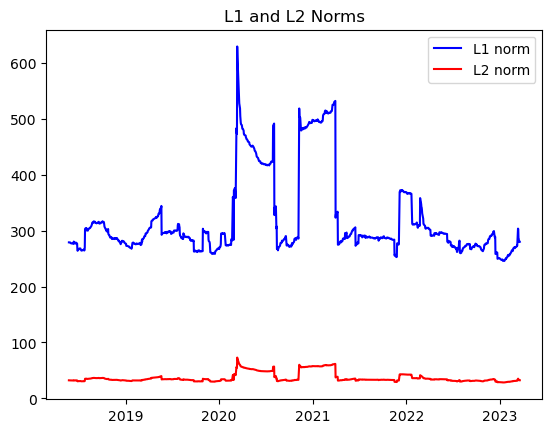

In [156]:
fig, ax = plt.subplots()

ax.plot(dates_lnorm, norms[:, 0], color='blue', label='L1 norm')
ax.plot(dates_lnorm, norms[:, 1], color='red', label='L2 norm')

ax.set_title("L1 and L2 Norms")
ax.legend()

plt.show()

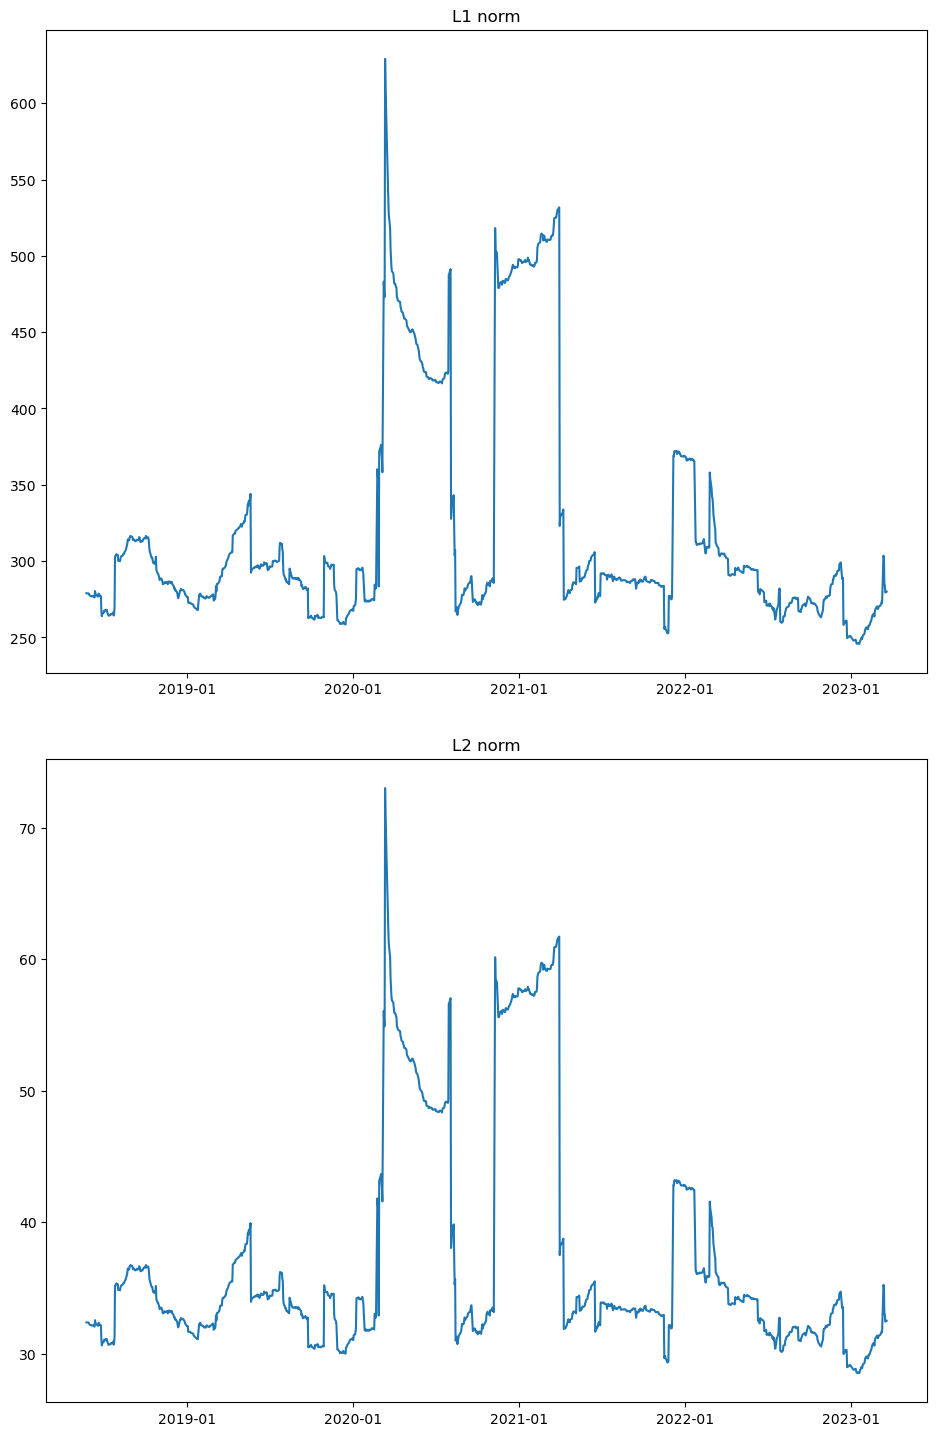

In [157]:
# Plotting returns and norms
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))


#axes[0].plot(dates, mean_df["mean"])
#axes[0].set_title("Mean returns of all companies")
axes[0].plot(dates_lnorm, norms[:, 0])
axes[0].set_title("L1 norm")
axes[1].plot(dates_lnorm, norms[:, 1])
axes[1].set_title("L2 norm")

for ax in axes:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout(pad=3)
plt.show()

In [158]:
# Check for critical dates
l1_norms = norms[:, 0]
n = 100
alfa = 0.9
beta = 0.9
m = 5 # m is number of continual trading dates [2,40]

critical_dates = []

for day in range(n, len(l1_norms)): # L1 norm

    # Define At as mean value of m continual trading days
    At = np.mean(l1_norms[day-m:day])

    #Bt is the mean value of the n continual trading dates
    Bt = np.mean(l1_norms[day-n:day])


    # Check condition 1
    if l1_norms[day] / l1_norms[day-1] < alfa:
        print('Verified restriction 1')
        print(dates_lnorm[day])

        # Check condition 2
        if l1_norms[day] / Bt <= beta and At/Bt<=beta:
            print('Verified restriction 2')
            print(dates_lnorm[day])
            critical_dates.append(dates_lnorm[day])

print(critical_dates)


Verified restriction 1
2018-12-27 00:00:00
Verified restriction 1
2019-10-08 00:00:00
Verified restriction 1
2020-03-12 00:00:00
Verified restriction 1
2020-03-24 00:00:00
Verified restriction 2
2020-03-24 00:00:00
Verified restriction 1
2020-11-09 00:00:00
Verified restriction 1
2020-11-16 00:00:00
Verified restriction 2
2020-11-16 00:00:00
Verified restriction 1
2021-01-26 00:00:00
Verified restriction 2
2021-01-26 00:00:00
Verified restriction 1
2021-09-02 00:00:00
Verified restriction 1
2022-07-28 00:00:00
[Timestamp('2020-03-24 00:00:00'), Timestamp('2020-11-16 00:00:00'), Timestamp('2021-01-26 00:00:00')]


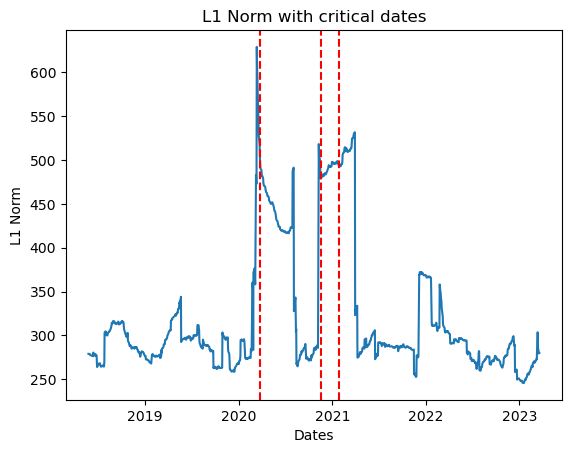

In [159]:
import matplotlib.pyplot as plt

# Assuming you have the following variables:
# l1_norms: List of L1 norms
# dates_lnorm: List of dates
# critical_dates: List of critical dates

fig, ax = plt.subplots()

# Plotting L1 norms vs. dates
ax.plot(dates_lnorm, l1_norms)

# Adding vertical red lines for critical dates
for date in critical_dates:
    ax.axvline(x=date, color='red', linestyle='--')

ax.set_xlabel('Dates')
ax.set_ylabel('L1 Norm')
ax.set_title('L1 Norm with critical dates')

plt.show()

